# **Problem Statement:**

1. **A credit** card is a small thin plastic or fiber card that incorporates
information about the person such as a picture or signature and the
person’s name on it to charge purchases and services to his linked
account. Charges are debited regularly. Nowadays, card data is read by
ATMs, swiping machines, store readers, banks and online transactions.

2. **Each card** has a unique card number which is very important. Its security
mainly relies on the physical security of the card and also the privacy of the
credit card number. There is a rapid growth in credit card transactions
which has led to substantial growth in scam cases.

3. **Credit** **card** fraud is expanding heavily because fraud financial loss is
increasing drastically. Multiple data mining and statistical techniques are
used to catch fraud. Therefore the detection of fraud using efficient and
secured methods are very important


# **Tasks To Be Performed:**

**1. Load the dataset using the pandas module.**

**2. Perform missing value analysis on the dataset.**

**3. From the dataset, calculate the number of genuine transactions, number of**
**fraud transactions and the percentage of fraud transactions.**

**4. Using the visualization module, visualize the genuine and fraudulent**
**transactions using a bar graph.**

**5. Using the Standard Scaler module, normalize the amount column and**
**store the new values in the NormalizedAmount column.**

**6. Split the dataset in train and test set and have a 70:30 split ratio for the**
**model.**

**7. Now use a decision tree and random forest model for training on top of the**
**train set.**

**8. Compare the predictions of both models using predict().**

**9. Compare the accuracy of both models using score().**

**10. Check the performance matrix of both models and compare which**
**model is having the highest performance.**


In [40]:
## import the necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Load the dataset using the pandas module.**

In [41]:
###Upload and read the dataset
df=pd.read_csv('/content/creditcard.csv')
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,Target
0,0.114697,0.796303,-0.149553,-0.823011,0.878763,-0.553152,0.939259,-0.108502,0.111137,-0.390521,...,-0.335776,-0.807853,-0.055940,-1.025281,-0.369557,0.204653,0.242724,0.085713,0.89,0
1,-0.039318,0.495784,-0.810884,0.546693,1.986257,4.386342,-1.344891,-1.743736,-0.563103,-0.616315,...,-1.377003,-0.072200,-0.197573,1.014807,1.011293,-0.167684,0.113136,0.256836,85.00,0
2,2.275706,-1.531508,-1.021969,-1.602152,-1.220329,-0.462376,-1.196485,-0.147058,-0.950224,1.560463,...,-0.193271,-0.103533,0.150945,-0.811083,-0.197913,-0.128446,0.014197,-0.051289,42.70,0
3,1.940137,-0.357671,-1.210551,0.382523,0.050823,-0.171322,-0.109124,-0.002115,0.869258,-0.001965,...,0.157994,0.650355,0.034206,0.739535,0.223605,-0.195509,-0.012791,-0.056841,29.99,0
4,1.081395,-0.502615,1.075887,-0.543359,-1.472946,-1.065484,-0.443231,-0.143374,1.659826,-1.131238,...,0.224157,0.821209,-0.137223,0.986259,0.563228,-0.574206,0.089673,0.052036,68.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56957,2.030797,-0.825073,-0.729555,-0.519187,-0.639893,-0.169482,-0.619049,-0.017902,-0.578643,0.915645,...,-0.790167,-1.825357,0.600083,0.702623,-0.782688,-0.007105,-0.041057,-0.038601,42.42,0
56958,-0.263947,1.119700,-0.639394,-0.880567,1.194120,-0.310693,0.962087,-0.088880,0.386664,0.195362,...,-0.448081,-0.893010,0.004678,0.062555,-0.347536,0.106510,0.274117,-0.036263,7.99,0
56959,2.206867,-0.748559,-1.443015,-1.101542,-0.332197,-0.646931,-0.536272,-0.129437,-0.712381,1.057616,...,0.471336,1.314052,0.038930,0.747315,0.158017,0.021897,-0.046200,-0.072586,1.00,0
56960,1.430579,-0.842354,0.415998,-1.328439,-1.284654,-0.888110,-0.653237,-0.238164,-2.220845,1.350845,...,-0.577415,-1.323989,0.336843,0.329714,-0.007425,-0.636401,0.037095,0.029180,30.00,0


**2. Perform missing value analysis on the dataset.**

In [42]:
df.isnull().sum()

,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0
V10,0


In [43]:
## Check the description of the data
df['V29'].describe()

,V29
count,56962.000000
mean,87.658797
std,258.042879
min,0.000000
25%,5.615000
50%,21.900000
75%,77.500000
max,25691.160000


**3. From the dataset, calculate the number of genuine transactions, number of**  **fraud transactions and the percentage of fraud transactions**

In [44]:
non_fraud=len(df[df.Target==0])
fraud=len(df[df.Target==1])
percentages_fraud=(fraud/(fraud+non_fraud)) * 100
print("number of genuine transactions:" , non_fraud)
print('number of fraud transactions:',  fraud)
print('percentage of fraud transactions:', percentages_fraud)

number of genuine transactions: 56864
number of fraud transactions: 98
percentage of fraud transactions: 0.17204452090867595


**4. Using the visualization module, visualize the genuine and fraudulent transactions using a bar graph.**

/tmp/ipython-input-3495446271.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=counts, palette=['green', 'red'])


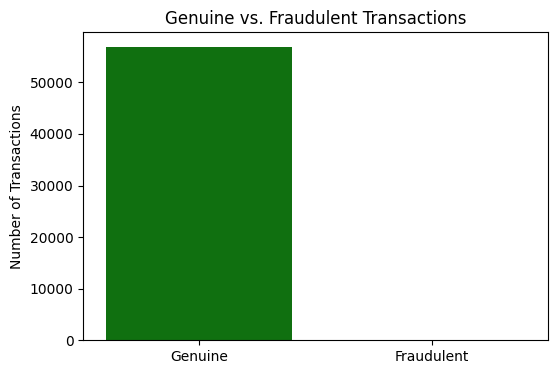

In [45]:
labels = ['Genuine', 'Fraudulent']
counts = [non_fraud, fraud]

plt.figure(figsize=(6, 4))
sns.barplot(x=labels, y=counts, palette=['green', 'red'])
plt.title('Genuine vs. Fraudulent Transactions')
plt.ylabel('Number of Transactions')
plt.show()

**5. Using the Standard Scaler module, normalize the amount column and store the new values in the NormalizedAmount column.**

In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df['NormalizedAmount'] = sc.fit_transform(df['V29'].values.reshape(-1, 1))
df.drop(['V29',], axis=1, inplace=True)

In [47]:
x = df.drop(['Target'], axis=1)
y = df['Target']

**6. Split the dataset in train and test set and have a 70:30 split ratio for the model.**

In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

**7. Now use a decision tree and random forest model for training on top of the train set.**

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [50]:
model1 = DecisionTreeClassifier()
##Train the model
model1.fit(x_train, y_train)

DecisionTreeClassifier()

In [51]:
model2 = RandomForestClassifier()
##Train the model
model2.fit(x_train, y_train)

RandomForestClassifier()

**8. Compare the predictions of both models using predict().**

In [52]:
y_pred1 = model1.predict(x_test)
y_pred2 = model2.predict(x_test)

**9. Compare the accuracy of both models using score().**

In [53]:
accuracy_score1 = accuracy_score(y_test, y_pred1)
accuracy_score2 = accuracy_score(y_test, y_pred2)
print("Accuracy of Decision Tree Model:", accuracy_score1)
print("Accuracy of Random Forest Model:", accuracy_score2)

Accuracy of Decision Tree Model: 0.999122242378138
Accuracy of Random Forest Model: 0.9994733454268828


10. **Check the performance matrix of both models and compare which**
**model is having the highest performance**


In [54]:
print("\n--- Decision Tree Model Performance ---")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred1))
print("Classification Report:\n", classification_report(y_test, y_pred1))

print("\n--- Random Forest Model Performance ---")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))
print("Classification Report:\n", classification_report(y_test, y_pred2))


--- Decision Tree Model Performance ---
Confusion Matrix:
 [[17057     8]
 [    7    17]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17065
           1       0.68      0.71      0.69        24

    accuracy                           1.00     17089
   macro avg       0.84      0.85      0.85     17089
weighted avg       1.00      1.00      1.00     17089


--- Random Forest Model Performance ---
Confusion Matrix:
 [[17063     2]
 [    7    17]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17065
           1       0.89      0.71      0.79        24

    accuracy                           1.00     17089
   macro avg       0.95      0.85      0.90     17089
weighted avg       1.00      1.00      1.00     17089



**In summary, the Random Forest model is more effective at correctly identifying fraudulent transactions (higher recall) while also making fewer incorrect fraud predictions (much higher precision and fewer false positives). This makes it the superior model for this fraud detection task.**

In [55]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Target,NormalizedAmount
0,0.114697,0.796303,-0.149553,-0.823011,0.878763,-0.553152,0.939259,-0.108502,0.111137,-0.390521,...,-0.335776,-0.807853,-0.055940,-1.025281,-0.369557,0.204653,0.242724,0.085713,0,-0.336260
1,-0.039318,0.495784,-0.810884,0.546693,1.986257,4.386342,-1.344891,-1.743736,-0.563103,-0.616315,...,-1.377003,-0.072200,-0.197573,1.014807,1.011293,-0.167684,0.113136,0.256836,0,-0.010304
2,2.275706,-1.531508,-1.021969,-1.602152,-1.220329,-0.462376,-1.196485,-0.147058,-0.950224,1.560463,...,-0.193271,-0.103533,0.150945,-0.811083,-0.197913,-0.128446,0.014197,-0.051289,0,-0.174231
3,1.940137,-0.357671,-1.210551,0.382523,0.050823,-0.171322,-0.109124,-0.002115,0.869258,-0.001965,...,0.157994,0.650355,0.034206,0.739535,0.223605,-0.195509,-0.012791,-0.056841,0,-0.223487
4,1.081395,-0.502615,1.075887,-0.543359,-1.472946,-1.065484,-0.443231,-0.143374,1.659826,-1.131238,...,0.224157,0.821209,-0.137223,0.986259,0.563228,-0.574206,0.089673,0.052036,0,-0.076185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56957,2.030797,-0.825073,-0.729555,-0.519187,-0.639893,-0.169482,-0.619049,-0.017902,-0.578643,0.915645,...,-0.790167,-1.825357,0.600083,0.702623,-0.782688,-0.007105,-0.041057,-0.038601,0,-0.175317
56958,-0.263947,1.119700,-0.639394,-0.880567,1.194120,-0.310693,0.962087,-0.088880,0.386664,0.195362,...,-0.448081,-0.893010,0.004678,0.062555,-0.347536,0.106510,0.274117,-0.036263,0,-0.308745
56959,2.206867,-0.748559,-1.443015,-1.101542,-0.332197,-0.646931,-0.536272,-0.129437,-0.712381,1.057616,...,0.471336,1.314052,0.038930,0.747315,0.158017,0.021897,-0.046200,-0.072586,0,-0.335834
56960,1.430579,-0.842354,0.415998,-1.328439,-1.284654,-0.888110,-0.653237,-0.238164,-2.220845,1.350845,...,-0.577415,-1.323989,0.336843,0.329714,-0.007425,-0.636401,0.037095,0.029180,0,-0.223449
